# Algoritmo DBSCAN
- Código adaptado do livro  Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow

In [12]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN 

# Gerando dados

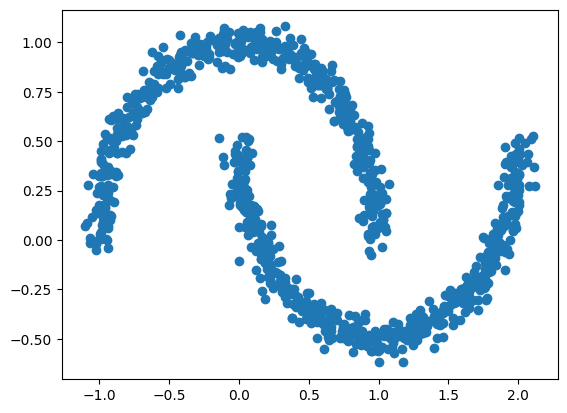

In [13]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
plt.scatter(X[:,0], X[:, 1])

# Treinando o DBSCAN
- [Documentação](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

In [14]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

- Podemos acessar os rótulos:

In [15]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

- Perceba que temos -1. esses são considerados outliers
- Podemos ver quantos grupos ele achou

In [16]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

- Podemos melhorar esses grupos al alterar os parâmetros

In [17]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [18]:
np.unique(dbscan2.labels_)

array([0, 1])

In [19]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

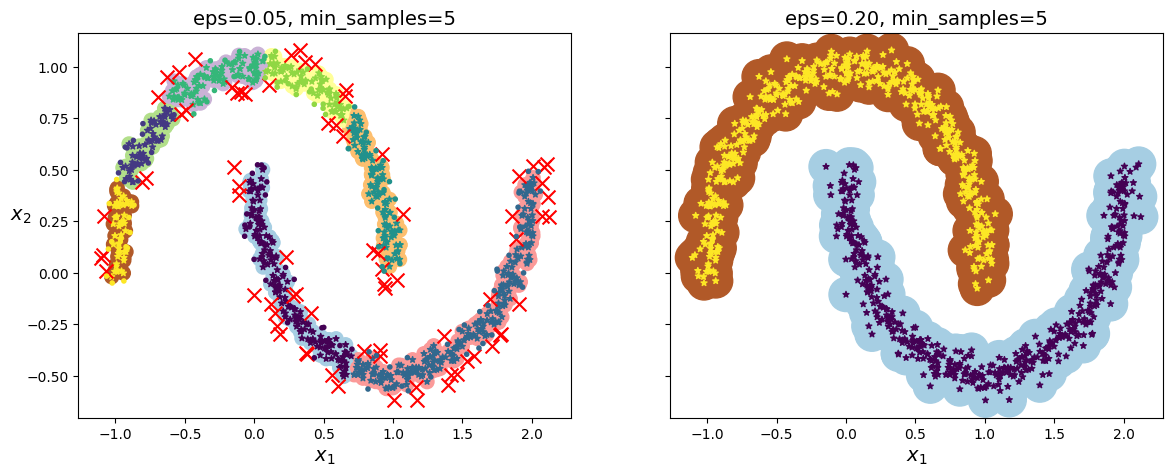

In [20]:
plt.figure(figsize=(14, 5))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)